# Dask

In [1]:
import numpy as np
import dask.array as da
from dask.dot import dot_graph

In [2]:
A = np.random.randn(800, 800)
B = np.dot(A, A.T).sum()

B

616357.63864643231

In [10]:
C = da.from_array(A, chunks=(400,400))
D = da.dot(C, C.T).sum() 

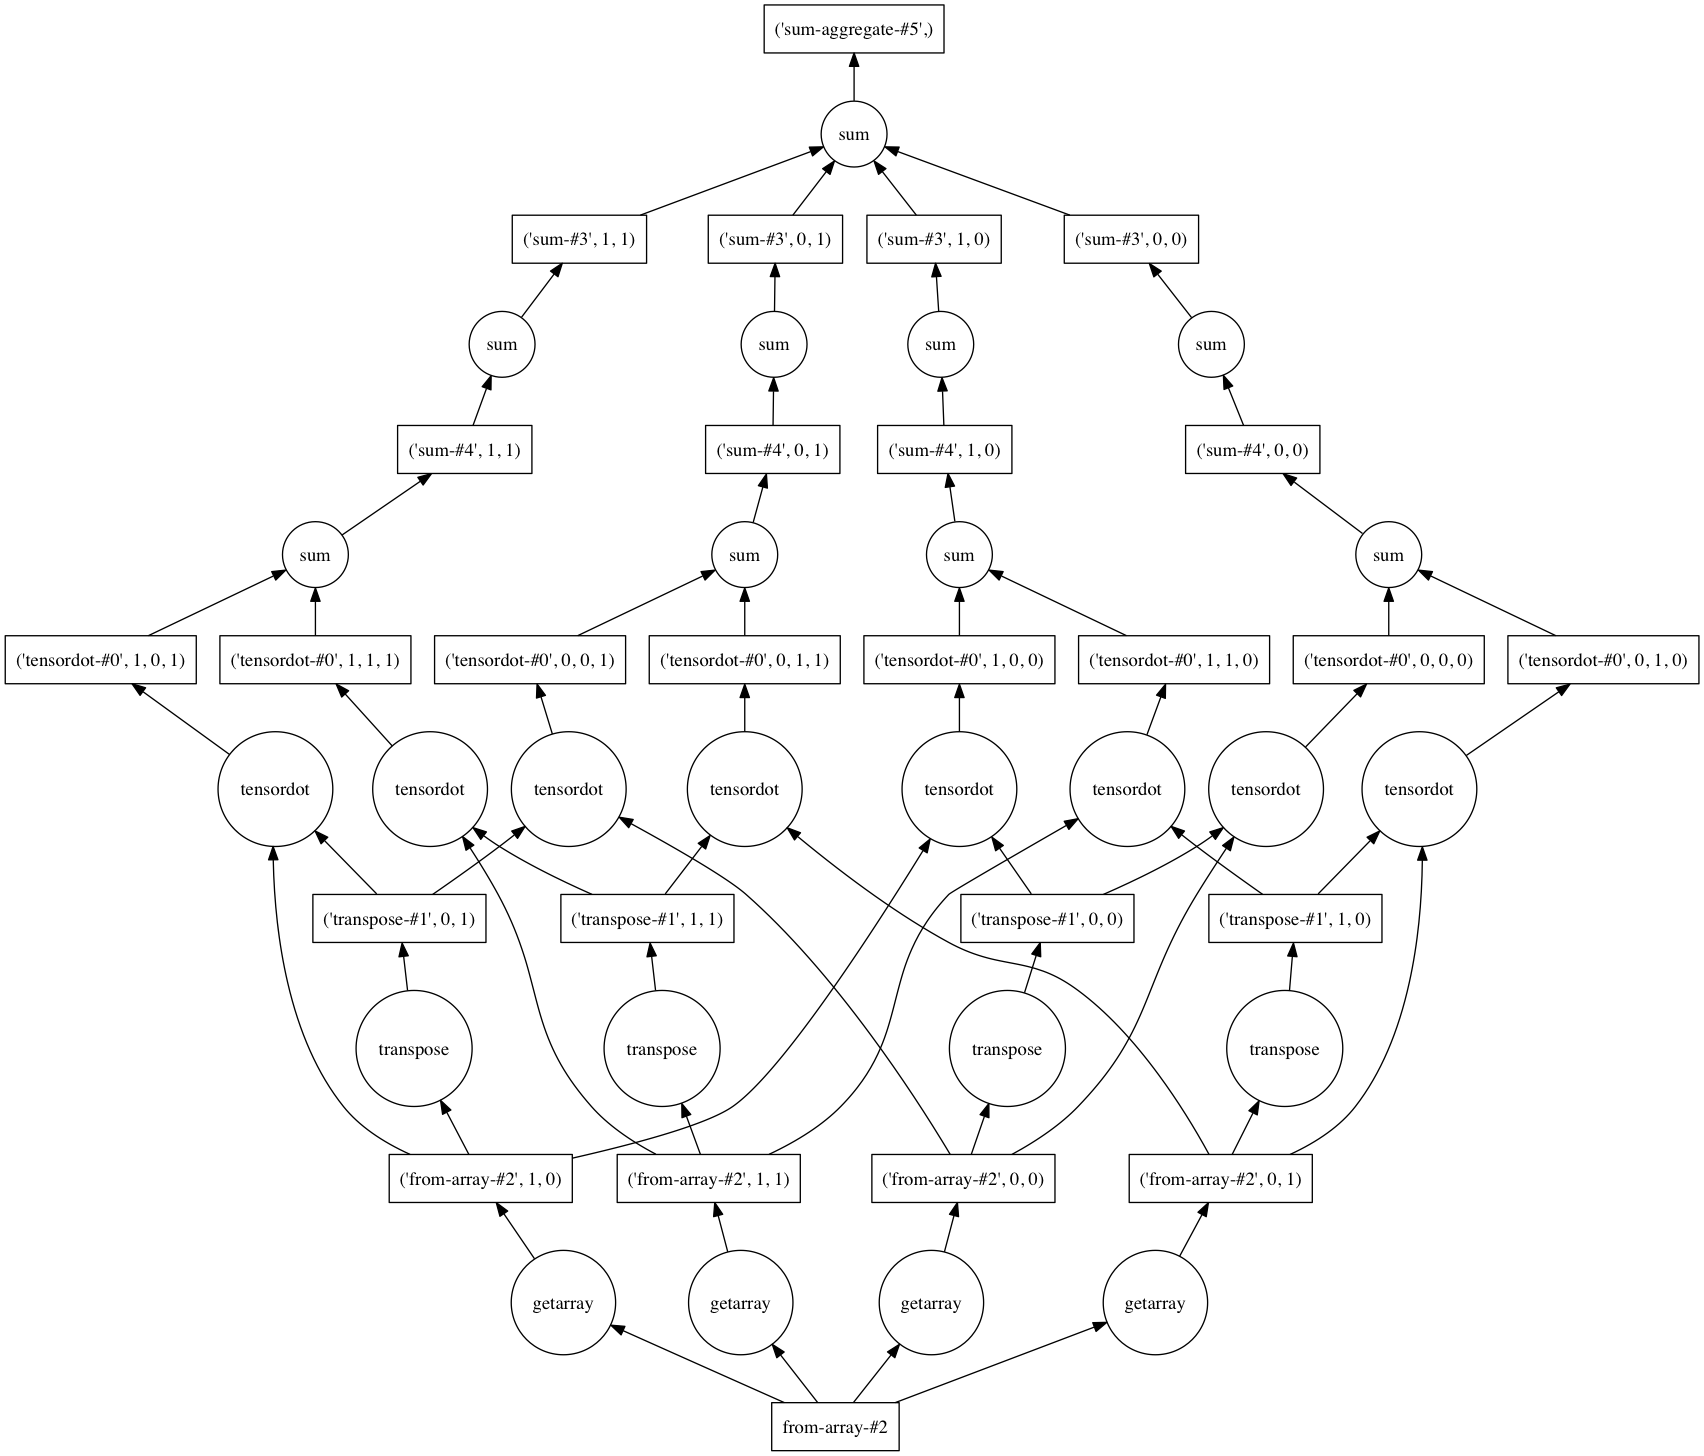

In [11]:
dot_graph(D.dask)

In [12]:
D.compute()

616357.63864643231

## Another example

This example is from the [dask tutorial](https://github.com/dask/dask-tutorial).

In [13]:
import os
import glob
import h5py
from matplotlib import pyplot as plt
%matplotlib inline

from prep import create_weather
create_weather()

In [14]:
filenames = sorted(glob.glob(os.path.join('data', 'weather-big', '*.hdf5')))
len(filenames)

31

It's about 2GB of data.

In [15]:
!du -m data/weather-big

2130	data/weather-big


In [16]:
dsets = [h5py.File(filename)['/t2m'] for filename in filenames]
len(dsets)

31

In [17]:
dsets[0].shape

(5760, 11520)

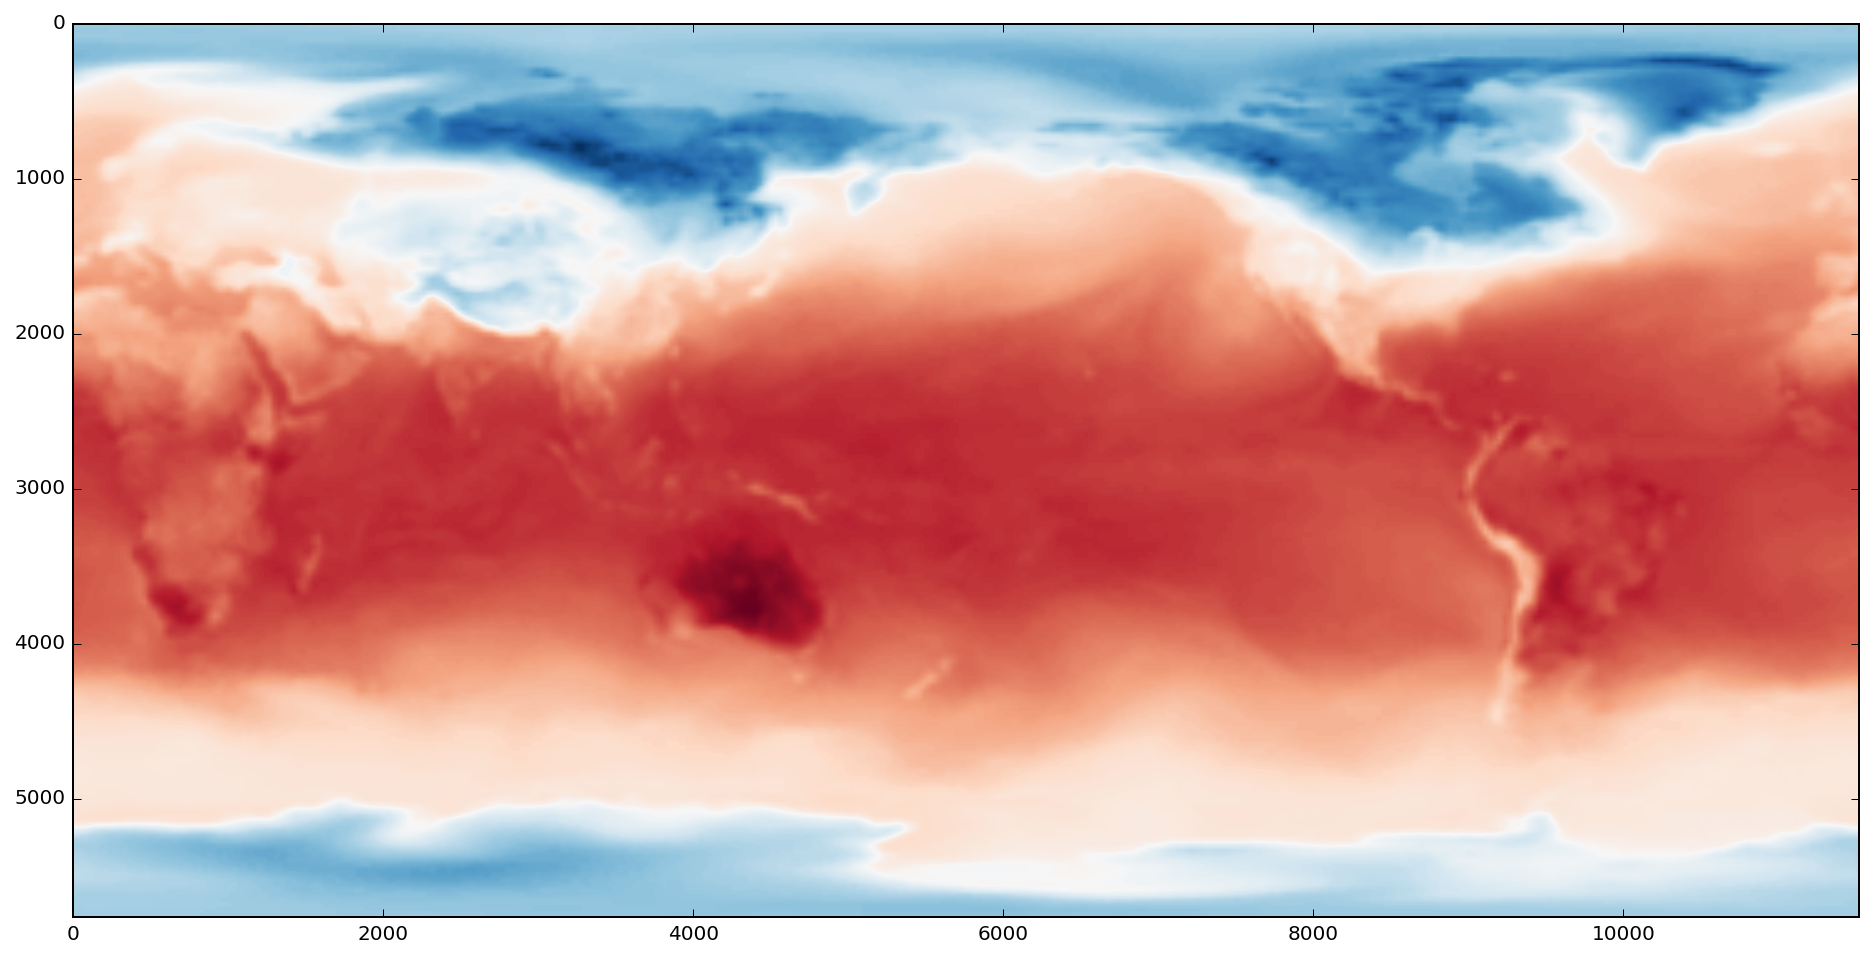

In [18]:
fig = plt.figure(figsize=(16, 8))
plt.imshow(dsets[0], cmap='RdBu_r')

## Dask

In [19]:
import dask.array as da
arrays = [da.from_array(dset, chunks=(500, 500)) for dset in dsets]

In [20]:
x = da.stack(arrays, axis=0)
x.shape

(31, 5760, 11520)

In [21]:
res = x.std(axis=0)
res.shape

(5760, 11520)

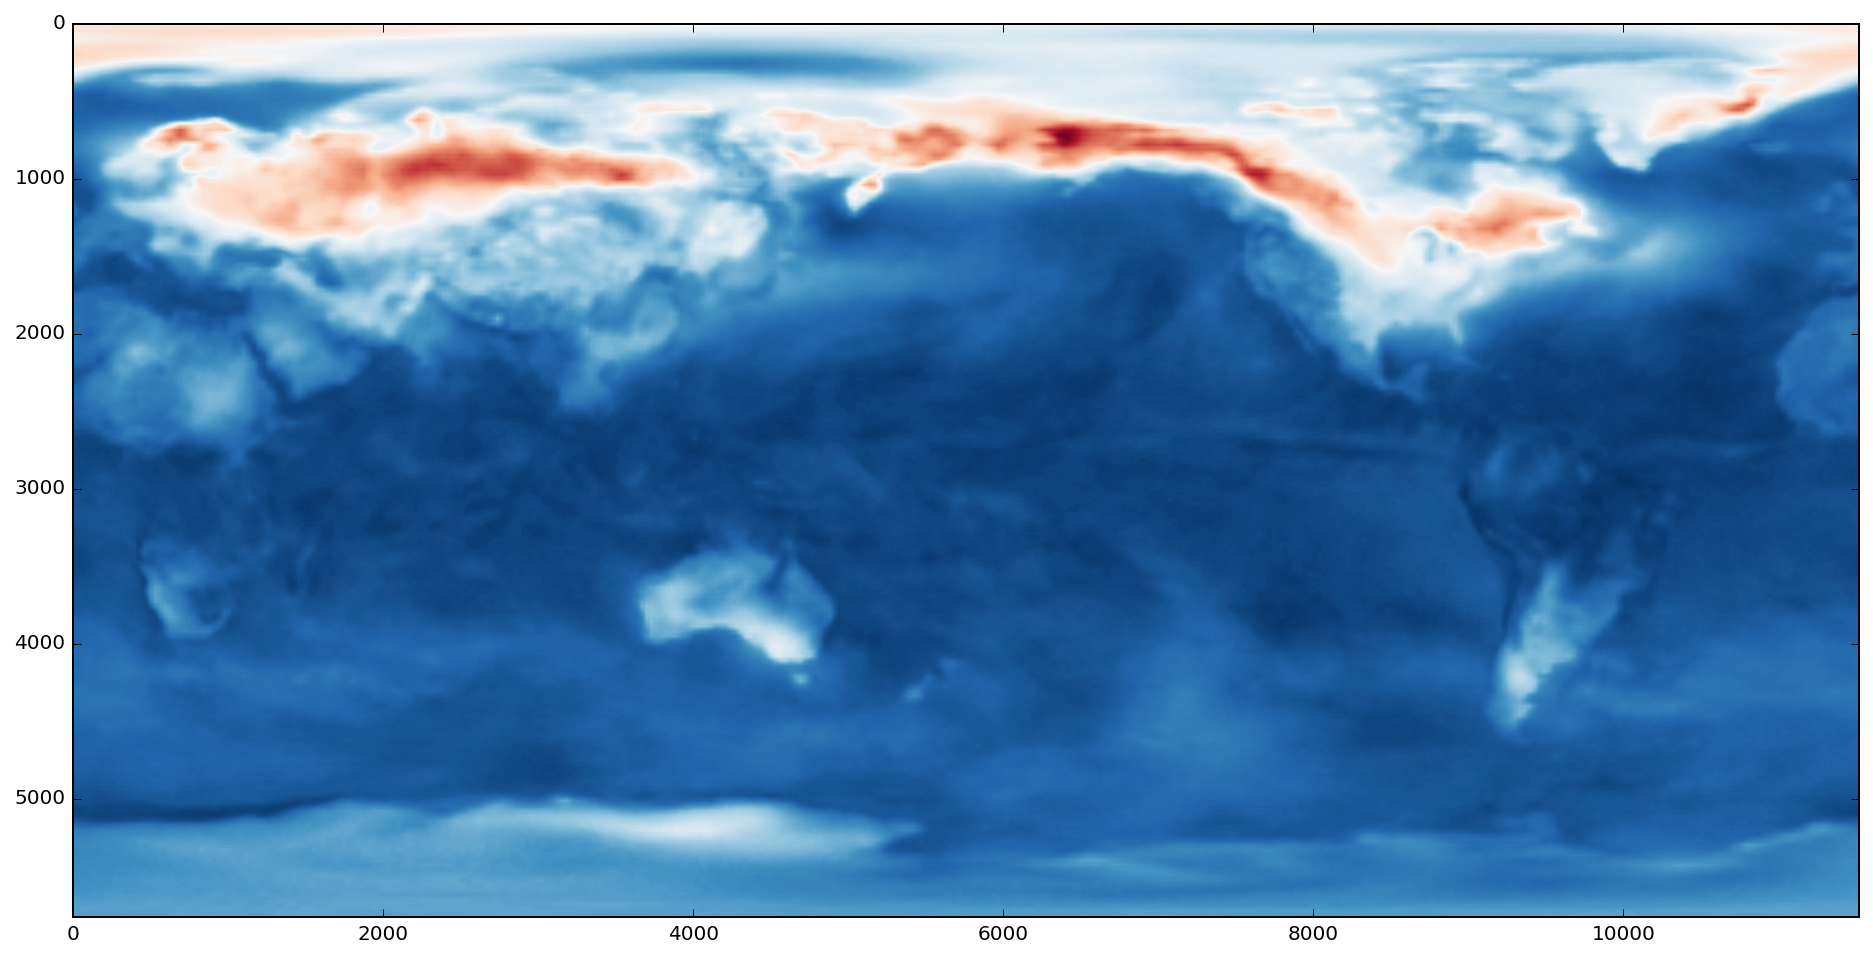

In [22]:
fig = plt.figure(figsize=(16, 8))
plt.imshow(res, cmap='RdBu_r')